<a href="https://colab.research.google.com/github/diogo-gb/AulaServlet12-09-23/blob/main/AgroSense_V3_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalando Dependencias do YoLo V8
!pip install ultralytics
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.7/881.7 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
# Conectar ao Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install albumentations #Biblioteca para fazer Data Augmentation

In [ ]:
#Bibiotecas Ultilizadas
import albumentations as A
import cv2
import os
import random
import matplotlib.pyplot as plt

# Caminho para a pasta de imagens
dataset_dir = '/content/drive/MyDrive/AgroSense-V3_03'

train_images_path = os.path.join(dataset_dir, 'train', 'images')

# Defina a transformação que será aplicada
augmentation = A.Compose([
    A.HorizontalFlip(p=0.5),  # Flip horizontal
    A.RandomRotate90(p=0.5),  # Rotação de 90 graus
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=30, p=0.5)  # Shift, scale e rotate
])

# Função para aplicar Data Augmentation
def augment_images(image_dir, save_dir, num_augmentations=3):
    # Verifique se o diretório existe
    if not os.path.exists(image_dir):
        print(f"Diretório de imagens não encontrado: {image_dir}")
        return

    # Verifique se o diretório de destino existe, senão crie
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Liste todas as imagens no diretório
    image_files = os.listdir(image_dir)

    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)

        # Leia a imagem
        image = cv2.imread(image_path)

        for i in range(num_augmentations):
            # Aplique a transformação
            augmented = augmentation(image=image)
            augmented_image = augmented['image']

            # Salve a imagem aumentada
            save_path = os.path.join(save_dir, f"{os.path.splitext(image_file)[0]}_aug_{i}.jpg")
            cv2.imwrite(save_path, augmented_image)

# Aumentar as imagens
augmented_save_dir = '/content/drive/MyDrive/AgroSense-V3_03/augmented_images'
augment_images(train_images_path, augmented_save_dir)

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


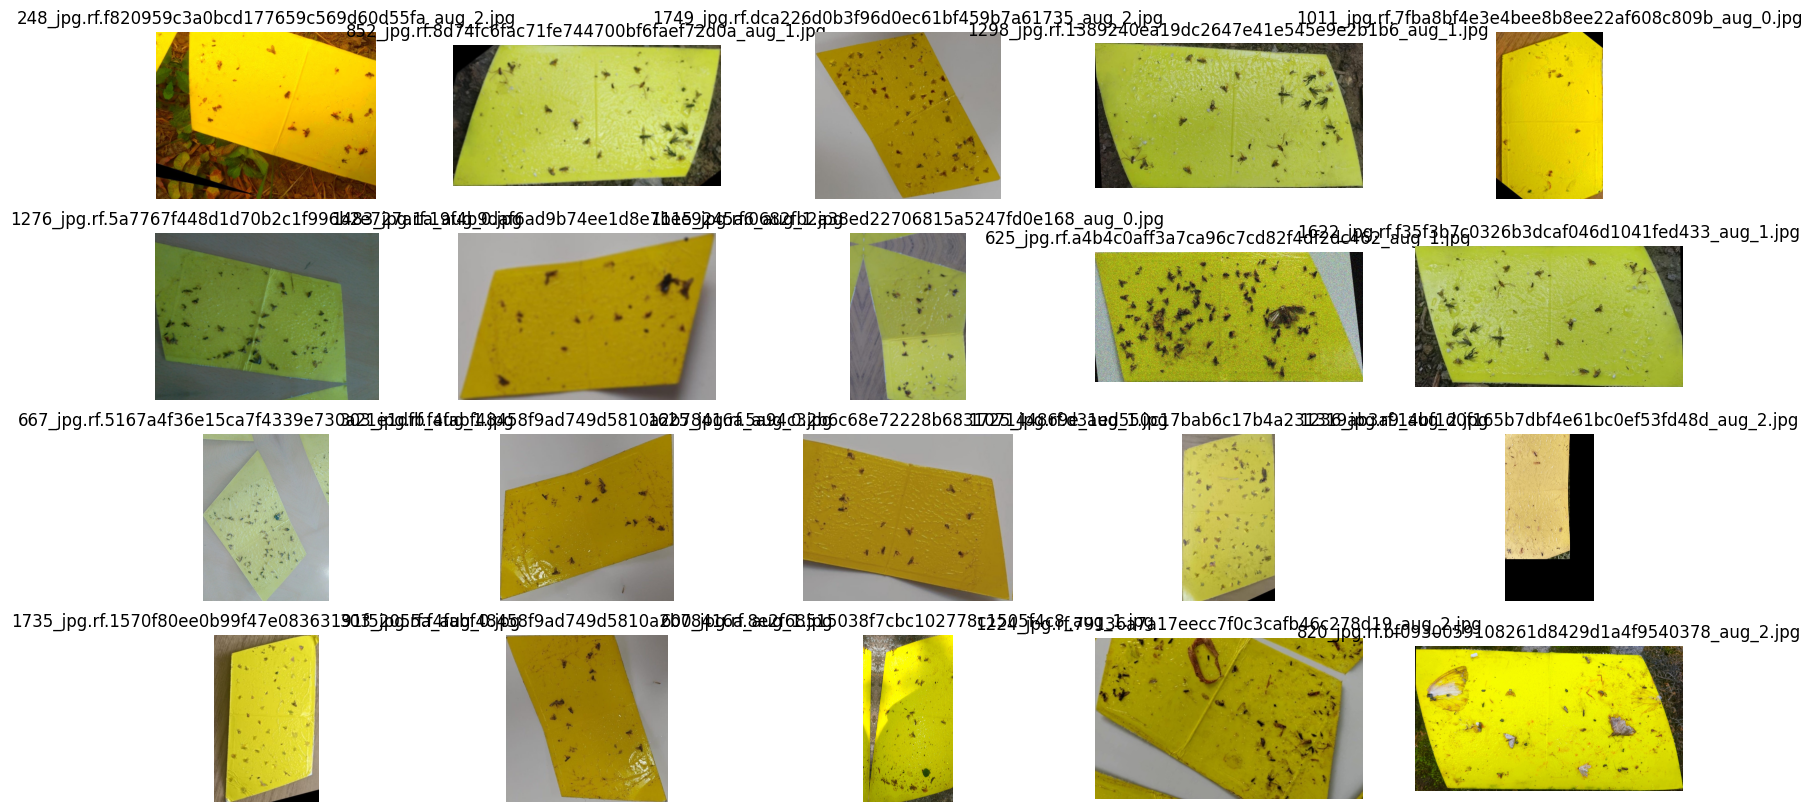

In [ ]:
def show_random_images(image_dir, num_images=20):
    # Liste todas as imagens no diretório
    image_files = os.listdir(image_dir)

    # Selecione imagens aleatórias
    random_images = random.sample(image_files, num_images)

    plt.figure(figsize=(20, 10))

    for i, image_file in enumerate(random_images):
        image_path = os.path.join(image_dir, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converter para RGB para mostrar no matplotlib

        plt.subplot(4, 5, i + 1)  # 4x5 grid de imagens
        plt.imshow(image)
        plt.axis('off')
        plt.title(image_file)

    plt.show()

# Mostrar 20 imagens aleatórias do dataset aumentado
show_random_images(augmented_save_dir, 20)

In [ ]:
# Acesse o diretório onde seu dataset está armazenado no Google Drive
dataset_dir = '/content/drive/MyDrive/AgroSense-V3_03' #Mudar para o V3

In [ ]:
# Certifique-se de que o caminho para o dataset aumentado esteja correto
dataset_dir = '/content/drive/MyDrive/AgroSense-V3_03'  # Verifique se este caminho está correto

# Caminhos para as pastas de imagens aumentadas
train_images_path = os.path.join(dataset_dir, 'train', 'images')
val_images_path = os.path.join(dataset_dir, 'val', 'images')
test_images_path = os.path.join(dataset_dir, 'test', 'images')

supported_formats = ['jpg', 'jpeg', 'png', 'bmp', 'tiff']

# Verifique se as imagens no diretório de treino estão nos formatos suportados
def check_image_formats(path, formats=supported_formats):
    # Verifique se o diretório existe antes de tentar acessá-lo
    if not os.path.exists(path):
        print(f"Diretório não encontrado: {path}")
        return

    for file in os.listdir(path):
        if file.split('.')[-1].lower() not in formats:
            print(f"Formato não suportado: {file}")
        else:
            print(f"Formato suportado: {file}")

# Verifique se o caminho existe antes de chamar a função
if os.path.exists(train_images_path):
    check_image_formats(train_images_path)
else:
    print(f"Diretório de treino não encontrado: {train_images_path}")


Formato suportado: 1756_jpg.rf.0eb1607d2d75c360127c6d665f617011.jpg
Formato suportado: 1770_jpg.rf.35d960554222f842f34450ed14911249.jpg
Formato suportado: 1782_jpg.rf.d9422d46af7b559807116de28719e432.jpg
Formato suportado: 1747_jpg.rf.f0445e4e156756740dd189aad193924f.jpg
Formato suportado: 175_jpg.rf.aa4bb763d2cec496c9bcb09641c788ad.jpg
Formato suportado: 1740_jpg.rf.fdfd60d5b52e3ef4706284b8805b25d6.jpg
Formato suportado: 1737_jpg.rf.6fdd42615c7440d99aed7d1c97d2d9eb.jpg
Formato suportado: 1739_jpg.rf.e4515af126a894bbaef23b99f4a21fd9.jpg
Formato suportado: 174_jpg.rf.b64c8c3e674ea27205ea2424f58104e1.jpg
Formato suportado: 181_jpg.rf.f5fe719784a7b095b25bff6b05c16ef6.jpg
Formato suportado: 1813_jpg.rf.5ff0a252a8166fd470b3749261472c42.jpg
Formato suportado: 179_jpg.rf.cafecfefdb0870b00a4cfb6860591bdc.jpg
Formato suportado: 1832_jpg.rf.1f790df435d109f89b811ac9fe7a9574.jpg
Formato suportado: 1806_jpg.rf.965d6d0fcb0e162b330400fae7555593.jpg
Formato suportado: 1797_jpg.rf.2346fdec680e9ada806b9

In [ ]:
# Instalação do pacote ultralytics
!pip install ultralytics

# Importando o objeto YOLO
from ultralytics import YOLO

# Inicializar o modelo YOLOv8
model = YOLO('yolov8n.yaml')  # Usando um modelo maior

# Definir o diretório do Google Drive para salvar os resultados
drive_project_path = '/content/drive/MyDrive/AgroSense-V3_03/agroSense_projectV3'

# Treinamento do modelo
results = model.train(
    data='/content/drive/MyDrive/AgroSense-V3_03/data.yaml', # Caminho para o arquivo data.yaml
    epochs=65,            # Número de épocas para o treinamento
    imgsz=544,             # Tamanho da imagem reduzido
    batch=8,               # Tamanho de batch reduzido
    save=True,             # Salvar os pesos e o modelo
    save_period=10,        # Salvamento dos pesos a cada N épocas
    workers=2,             # Número de workers
    project=drive_project_path,  # Diretório no Google Drive para salvar o projeto
    name='yellow_sticky_model',  # Nome do modelo
    exist_ok=True,          # Permitir sobreposição de resultados anteriores
    amp=True,              # Habilitar mixed precision training
    # device='cpu'             # Use CPU for training
)

# Exibir a localização dos resultados
print(f"Resultados salvos em: {drive_project_path}/yellow_sticky_model")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.0/882.0 kB 39.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.6 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/AgroSense-V3_03/data.yaml, epochs=65, time=None, patience=100, batch=8, imgsz=544, save=True, save_period=10, cache=False, device=None, workers=2, project=/content/drive/MyDrive/AgroSense-V3_03/agroSense_projectV3, name=yellow_sticky_model, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=

100%|██████████| 755k/755k [00:00<00:00, 117MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 326MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/AgroSense-V3_03/train/labels.cache... 1864 images, 162 backgrounds, 0 corrupt: 100%|██████████| 1864/1864 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/AgroSense-V3_03/val/labels.cache... 118 images, 7 backgrounds, 0 corrupt: 100%|██████████| 118/118 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/AgroSense-V3_03/agroSense_projectV3/yellow_sticky_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 544 train, 544 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/AgroSense-V3_03/agroSense_projectV3/yellow_sticky_model
Starting training for 65 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/65      2.37G      5.244      4.952      2.782        399        544: 100%|██████████| 233/233 [19:27<00:00,  5.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]

                   all        118       3065      0.323       0.44      0.279     0.0793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/65      2.07G      2.572      1.551      1.294        585        544: 100%|██████████| 233/233 [01:02<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.38it/s]

                   all        118       3065      0.347      0.471      0.291      0.068



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/65      2.34G      2.331      1.386      1.176        288        544: 100%|██████████| 233/233 [01:00<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.98it/s]

                   all        118       3065      0.562       0.73      0.601      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/65      1.63G      2.226      1.314      1.144        443        544: 100%|██████████| 233/233 [01:02<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]

                   all        118       3065      0.543      0.766      0.583      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/65      2.83G      2.163      1.264      1.114        285        544: 100%|██████████| 233/233 [01:00<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.50it/s]

                   all        118       3065      0.564      0.755      0.597      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/65      2.35G      2.115       1.24      1.105        331        544: 100%|██████████| 233/233 [01:02<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]

                   all        118       3065      0.592      0.778       0.65      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/65      1.65G      2.073      1.193      1.102        259        544: 100%|██████████| 233/233 [00:59<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.32it/s]


                   all        118       3065      0.552      0.718      0.604      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/65      2.02G      2.053      1.189       1.09        320        544: 100%|██████████| 233/233 [01:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.60it/s]

                   all        118       3065      0.566      0.735      0.612      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/65      2.15G      2.002      1.147      1.076        464        544: 100%|██████████| 233/233 [01:00<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.76it/s]


                   all        118       3065      0.629      0.766      0.688       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/65      2.02G      2.012      1.124      1.075        470        544: 100%|██████████| 233/233 [01:02<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.13it/s]

                   all        118       3065      0.605      0.804      0.688      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/65       1.9G      2.009      1.134       1.07        304        544: 100%|██████████| 233/233 [01:00<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.20it/s]

                   all        118       3065      0.651      0.793      0.734        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/65      2.45G       1.97      1.086      1.063        550        544: 100%|██████████| 233/233 [01:03<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.46it/s]

                   all        118       3065      0.574      0.711      0.626      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/65      2.17G      1.949      1.088      1.063        395        544: 100%|██████████| 233/233 [01:00<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]


                   all        118       3065      0.657      0.813      0.749      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/65      2.41G      1.956      1.073      1.058        234        544: 100%|██████████| 233/233 [01:04<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.10it/s]


                   all        118       3065      0.634      0.775      0.718      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/65      2.03G      1.939      1.064      1.058        387        544: 100%|██████████| 233/233 [01:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.53it/s]


                   all        118       3065       0.66      0.801      0.727      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/65      1.84G      1.927      1.036      1.048        251        544: 100%|██████████| 233/233 [01:03<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.73it/s]

                   all        118       3065       0.68      0.816      0.757      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/65      1.55G      1.924      1.032      1.049        324        544: 100%|██████████| 233/233 [01:00<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.55it/s]

                   all        118       3065      0.692      0.817      0.781      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/65      1.93G      1.902      1.016      1.041        390        544: 100%|██████████| 233/233 [01:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.80it/s]


                   all        118       3065      0.706      0.801      0.771      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/65       1.8G      1.926      1.039      1.046        287        544: 100%|██████████| 233/233 [01:02<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.90it/s]

                   all        118       3065      0.669      0.806      0.745      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/65      2.03G      1.896       1.01      1.044        691        544: 100%|██████████| 233/233 [01:02<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.05it/s]

                   all        118       3065      0.714      0.832      0.807      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/65      1.74G      1.899      1.002       1.04        219        544: 100%|██████████| 233/233 [01:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.96it/s]


                   all        118       3065      0.712      0.817      0.801      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/65       2.7G      1.898     0.9952      1.043        484        544: 100%|██████████| 233/233 [01:03<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.90it/s]


                   all        118       3065      0.689      0.838      0.802      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/65      1.74G      1.862      0.995       1.04        571        544: 100%|██████████| 233/233 [01:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.57it/s]

                   all        118       3065      0.684      0.826      0.767      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/65      2.61G       1.86     0.9768      1.032        485        544: 100%|██████████| 233/233 [01:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.92it/s]

                   all        118       3065      0.711      0.804      0.795      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/65         2G      1.848     0.9649      1.034        315        544: 100%|██████████| 233/233 [01:03<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.61it/s]


                   all        118       3065      0.716      0.824      0.814      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/65      2.24G       1.84     0.9642      1.025        257        544: 100%|██████████| 233/233 [01:00<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.83it/s]

                   all        118       3065      0.713      0.847      0.817      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/65      1.63G       1.83     0.9509      1.024        477        544: 100%|██████████| 233/233 [01:03<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.67it/s]

                   all        118       3065      0.701      0.844      0.811      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/65      1.79G      1.821     0.9511      1.025        368        544: 100%|██████████| 233/233 [01:00<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.84it/s]

                   all        118       3065      0.716      0.841      0.802      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/65      2.16G      1.805     0.9251      1.024        427        544: 100%|██████████| 233/233 [01:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.31it/s]

                   all        118       3065      0.745      0.802      0.823       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/65      3.13G       1.81     0.9317      1.025        327        544: 100%|██████████| 233/233 [01:00<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.80it/s]

                   all        118       3065      0.728      0.827      0.816      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/65      2.13G      1.842     0.9462      1.017        425        544: 100%|██████████| 233/233 [01:03<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.80it/s]

                   all        118       3065      0.729      0.848       0.82      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/65      3.02G      1.809     0.9189      1.022        484        544: 100%|██████████| 233/233 [01:00<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.46it/s]

                   all        118       3065      0.731      0.845      0.821      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/65      2.16G      1.788     0.9242      1.018        401        544: 100%|██████████| 233/233 [01:03<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.04it/s]

                   all        118       3065      0.728       0.86      0.834      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/65      1.67G      1.819     0.9365      1.025        288        544: 100%|██████████| 233/233 [01:00<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.29it/s]

                   all        118       3065      0.736      0.801      0.819      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/65      2.32G      1.814     0.9368      1.021        488        544: 100%|██████████| 233/233 [01:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.59it/s]

                   all        118       3065      0.733      0.854      0.831      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/65      2.12G      1.808     0.9135      1.021        243        544: 100%|██████████| 233/233 [01:08<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.83it/s]

                   all        118       3065       0.73      0.868      0.836      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/65      2.34G      1.802     0.9116      1.014        579        544: 100%|██████████| 233/233 [01:00<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.58it/s]

                   all        118       3065      0.733      0.842      0.826       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/65      2.05G      1.795     0.9016      1.012        236        544: 100%|██████████| 233/233 [01:09<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.44it/s]

                   all        118       3065      0.737      0.854       0.84      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/65      1.58G       1.79     0.8986      1.008        269        544: 100%|██████████| 233/233 [01:02<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]

                   all        118       3065      0.741      0.838      0.839       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/65      2.14G      1.788     0.9008      1.013        206        544: 100%|██████████| 233/233 [01:04<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.75it/s]

                   all        118       3065      0.748      0.849       0.84       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/65      1.96G      1.788     0.9089      1.013        419        544: 100%|██████████| 233/233 [01:05<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.51it/s]

                   all        118       3065      0.734      0.865      0.843      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/65      2.08G      1.768     0.8937      1.013        278        544: 100%|██████████| 233/233 [01:01<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.06it/s]

                   all        118       3065      0.734      0.831      0.823      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/65      2.11G      1.756     0.8884      1.011        337        544: 100%|██████████| 233/233 [01:04<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.25it/s]

                   all        118       3065      0.757       0.84      0.837      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/65      2.44G      1.776     0.8872      1.012        121        544: 100%|██████████| 233/233 [01:04<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.47it/s]


                   all        118       3065      0.743       0.85      0.835      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/65      2.15G      1.757     0.8847      1.011        700        544: 100%|██████████| 233/233 [01:02<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.05it/s]

                   all        118       3065      0.739      0.855      0.841      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/65      2.25G      1.783     0.8889      1.012        215        544: 100%|██████████| 233/233 [00:59<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.43it/s]

                   all        118       3065      0.749      0.854      0.841      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/65       1.9G      1.771     0.8875      1.008        247        544: 100%|██████████| 233/233 [01:02<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.54it/s]


                   all        118       3065      0.756      0.855      0.848      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/65       2.2G      1.759     0.8795      1.012        502        544: 100%|██████████| 233/233 [01:00<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.74it/s]

                   all        118       3065      0.736      0.858      0.843      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/65       1.9G      1.758     0.8735      1.002        444        544: 100%|██████████| 233/233 [01:02<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]

                   all        118       3065      0.745      0.836      0.839       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/65      2.14G      1.737      0.873      1.003        413        544: 100%|██████████| 233/233 [01:04<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.45it/s]

                   all        118       3065      0.745      0.853      0.844      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/65       2.3G      1.749     0.8733      1.006        339        544: 100%|██████████| 233/233 [01:12<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]

                   all        118       3065      0.742      0.869      0.842      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/65      1.79G      1.736     0.8651      1.009        295        544: 100%|██████████| 233/233 [01:12<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.45it/s]

                   all        118       3065      0.739      0.874       0.85      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/65      2.05G      1.727     0.8525     0.9987        169        544: 100%|██████████| 233/233 [01:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

                   all        118       3065       0.75      0.873      0.856      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/65      2.01G      1.751     0.8708      1.003        218        544: 100%|██████████| 233/233 [01:02<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.35it/s]


                   all        118       3065      0.746       0.85      0.844      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/65       1.5G       1.73      0.865     0.9983        321        544: 100%|██████████| 233/233 [01:08<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.09it/s]

                   all        118       3065      0.748       0.87      0.853      0.387


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/65      1.85G      1.757     0.8856      1.045        125        544: 100%|██████████| 233/233 [01:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.62it/s]

                   all        118       3065      0.745      0.861      0.842      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/65      1.73G      1.726     0.8667      1.025        356        544: 100%|██████████| 233/233 [01:02<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.01it/s]


                   all        118       3065      0.737      0.869      0.846      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/65      1.83G      1.735     0.8782       1.03        313        544: 100%|██████████| 233/233 [01:00<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.65it/s]

                   all        118       3065      0.746      0.851      0.844      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/65      1.39G      1.725     0.8593      1.031        353        544: 100%|██████████| 233/233 [01:00<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.87it/s]

                   all        118       3065      0.748       0.85      0.845       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/65      1.19G      1.721     0.8607      1.031        269        544: 100%|██████████| 233/233 [01:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.36it/s]

                   all        118       3065      0.743      0.852      0.843      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/65      1.67G      1.711     0.8509      1.028        168        544: 100%|██████████| 233/233 [01:00<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.54it/s]

                   all        118       3065      0.748      0.857      0.846       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/65      1.35G      1.703     0.8474      1.028        267        544: 100%|██████████| 233/233 [01:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.20it/s]

                   all        118       3065      0.761      0.844      0.848      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/65      1.64G      1.689     0.8358      1.023        395        544: 100%|██████████| 233/233 [01:02<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.58it/s]

                   all        118       3065      0.747      0.869       0.85      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/65      1.44G      1.699     0.8419      1.027        232        544: 100%|██████████| 233/233 [01:12<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.53it/s]


                   all        118       3065      0.754       0.86      0.851      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/65       1.9G      1.697     0.8348      1.022         94        544: 100%|██████████| 233/233 [01:01<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.17it/s]

                   all        118       3065      0.746      0.859      0.849      0.384



65 epochs completed in 1.503 hours.
Optimizer stripped from /content/drive/MyDrive/AgroSense-V3_03/agroSense_projectV3/yellow_sticky_model/weights/last.pt, 5.6MB
Optimizer stripped from /content/drive/MyDrive/AgroSense-V3_03/agroSense_projectV3/yellow_sticky_model/weights/best.pt, 5.6MB

Validating /content/drive/MyDrive/AgroSense-V3_03/agroSense_projectV3/yellow_sticky_model/weights/best.pt...
WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.6 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]


                   all        118       3065      0.749      0.869      0.855      0.388
Speed: 0.4ms preprocess, 6.7ms inference, 0.0ms loss, 7.6ms postprocess per image
Results saved to /content/drive/MyDrive/AgroSense-V3_03/agroSense_projectV3/yellow_sticky_model
Resultados salvos em: /content/drive/MyDrive/AgroSense-V3_03/agroSense_projectV3/yellow_sticky_model


In [ ]:
# Avaliar o modelo (mAP-40, precision, recall, F1 etc.)
metrics = model.val()

WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.6 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs


val: Scanning /content/drive/MyDrive/AgroSense-V3_03/val/labels.cache... 118 images, 7 backgrounds, 0 corrupt: 100%|██████████| 118/118 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.76it/s]


                   all        118       3065      0.749      0.869      0.855      0.389
Speed: 0.3ms preprocess, 10.7ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to /content/drive/MyDrive/AgroSense-V3_03/agroSense_projectV3/yellow_sticky_model


In [ ]:
import os

# Define o caminho onde a pasta deve estar
folder_path = '/content/drive/MyDrive/AgroSense-V3_03/agroSense_projectV3'

# Verifica se a pasta existe
if os.path.exists(folder_path):
    print(f"Pasta encontrada: {folder_path}")
else:
    print("Pasta não encontrada.")

Pasta encontrada: /content/drive/MyDrive/AgroSense-V3_03/agroSense_projectV3


In [ ]:
import pandas as pd

# Carregar os resultados de treinamento
results_file = '/content/drive/MyDrive/AgroSense-V3_03/agroSense_projectV3/yellow_sticky_model/results.csv'
data = pd.read_csv(results_file)

# Exibir as primeiras linhas do arquivo e as colunas disponíveis
print(data.head())
print("Colunas disponíveis:", data.columns)


                  epoch        train/box_loss        train/cls_loss  \
0                     1                5.2438                4.9516   
1                     2                2.5725                1.5511   
2                     3                2.3311                1.3861   
3                     4                2.2260                1.3143   
4                     5                2.1626                1.2638   

         train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
0                2.7816               0.32277               0.44013   
1                1.2941               0.34668               0.47113   
2                1.1759               0.56159               0.72971   
3                1.1444               0.54296               0.76607   
4                1.1144               0.56408               0.75465   

       metrics/mAP50(B)   metrics/mAP50-95(B)          val/box_loss  \
0               0.27861               0.07933                2.8052   
1   

Resultados carregados de /content/drive/MyDrive/AgroSense-V3_03/agroSense_projectV3/yellow_sticky_model/results.csv


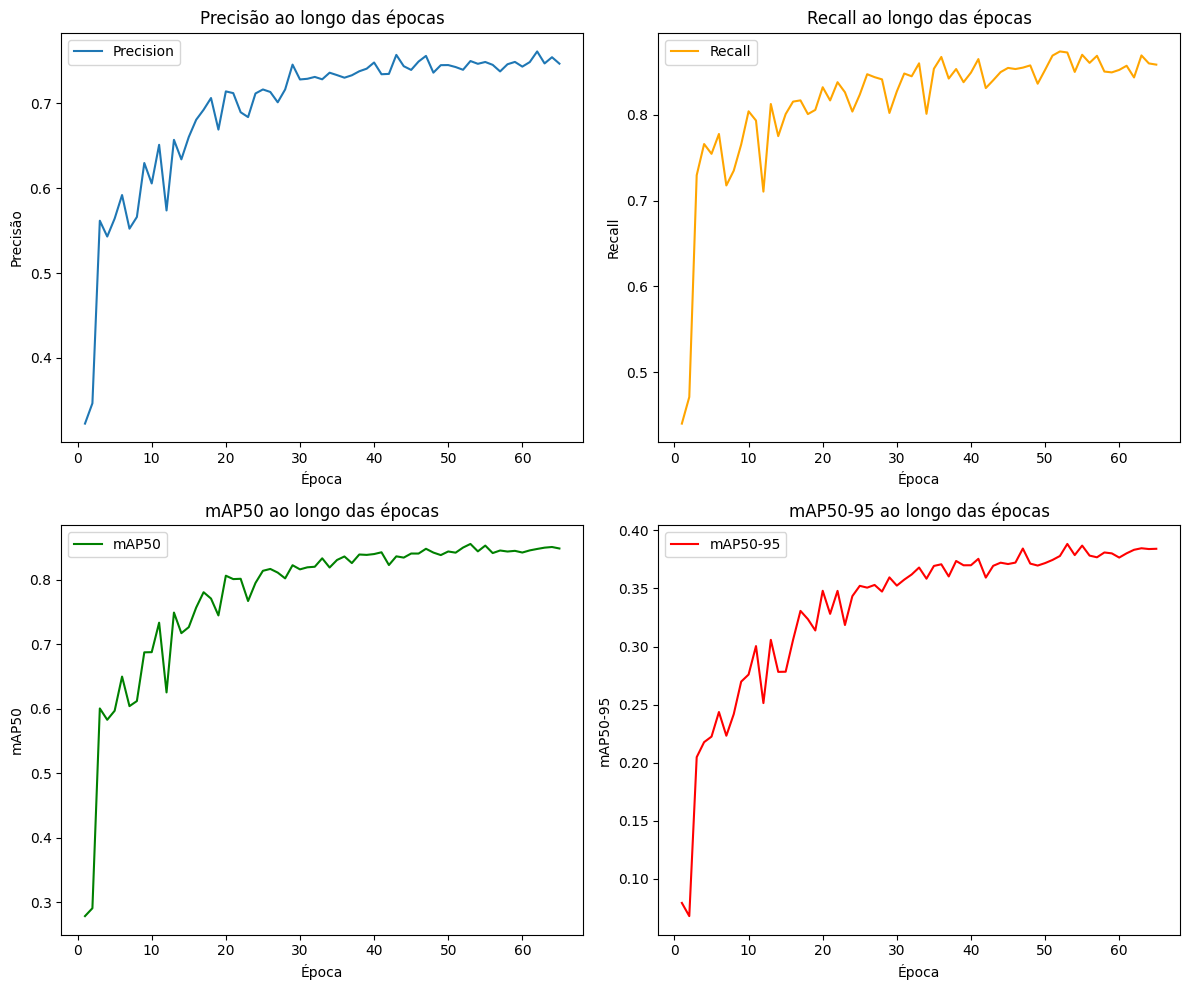

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# Diretório dos resultados do treinamento
results_dir = '/content/drive/MyDrive/AgroSense-V3_03/agroSense_projectV3/yellow_sticky_model'

# Função para carregar os resultados
def load_results(results_dir):
    # Verifica se o arquivo de resultados existe
    results_file = os.path.join(results_dir, 'results.csv')
    if os.path.exists(results_file):
        print(f"Resultados carregados de {results_file}")
        return results_file
    else:
        print(f"Arquivo de resultados não encontrado em {results_dir}")
        return None

# Função para plotar os gráficos de métricas
def plot_training_metrics(results_file):
    # Carregar os resultados de treinamento
    data = pd.read_csv(results_file)

    # Remover espaços extras nos nomes das colunas
    data.columns = data.columns.str.strip()

    # Plotar Precision, Recall e mAP
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Gráfico da Precisão
    axes[0, 0].plot(data['epoch'], data['metrics/precision(B)'], label='Precision')
    axes[0, 0].set_title('Precisão ao longo das épocas')
    axes[0, 0].set_xlabel('Época')
    axes[0, 0].set_ylabel('Precisão')
    axes[0, 0].legend()

    # Gráfico do Recall
    axes[0, 1].plot(data['epoch'], data['metrics/recall(B)'], label='Recall', color='orange')
    axes[0, 1].set_title('Recall ao longo das épocas')
    axes[0, 1].set_xlabel('Época')
    axes[0, 1].set_ylabel('Recall')
    axes[0, 1].legend()

    # Gráfico do mAP50
    axes[1, 0].plot(data['epoch'], data['metrics/mAP50(B)'], label='mAP50', color='green')
    axes[1, 0].set_title('mAP50 ao longo das épocas')
    axes[1, 0].set_xlabel('Época')
    axes[1, 0].set_ylabel('mAP50')
    axes[1, 0].legend()

    # Gráfico do mAP50-95
    axes[1, 1].plot(data['epoch'], data['metrics/mAP50-95(B)'], label='mAP50-95', color='red')
    axes[1, 1].set_title('mAP50-95 ao longo das épocas')
    axes[1, 1].set_xlabel('Época')
    axes[1, 1].set_ylabel('mAP50-95')
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()

# Carregar e visualizar os resultados
results_file = load_results(results_dir)
if results_file:
    plot_training_metrics(results_file)



0: 544x288 62 moscas, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 288)

0: 416x544 (no detections), 8.4ms
Speed: 2.2ms preprocess, 8.4ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 544)

0: 544x320 36 moscas, 37.2ms
Speed: 1.8ms preprocess, 37.2ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 320)

0: 320x544 12 moscas, 36.3ms
Speed: 2.1ms preprocess, 36.3ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 544)

0: 288x544 12 moscas, 61.7ms
Speed: 2.7ms preprocess, 61.7ms inference, 1.8ms postprocess per image at shape (1, 3, 288, 544)


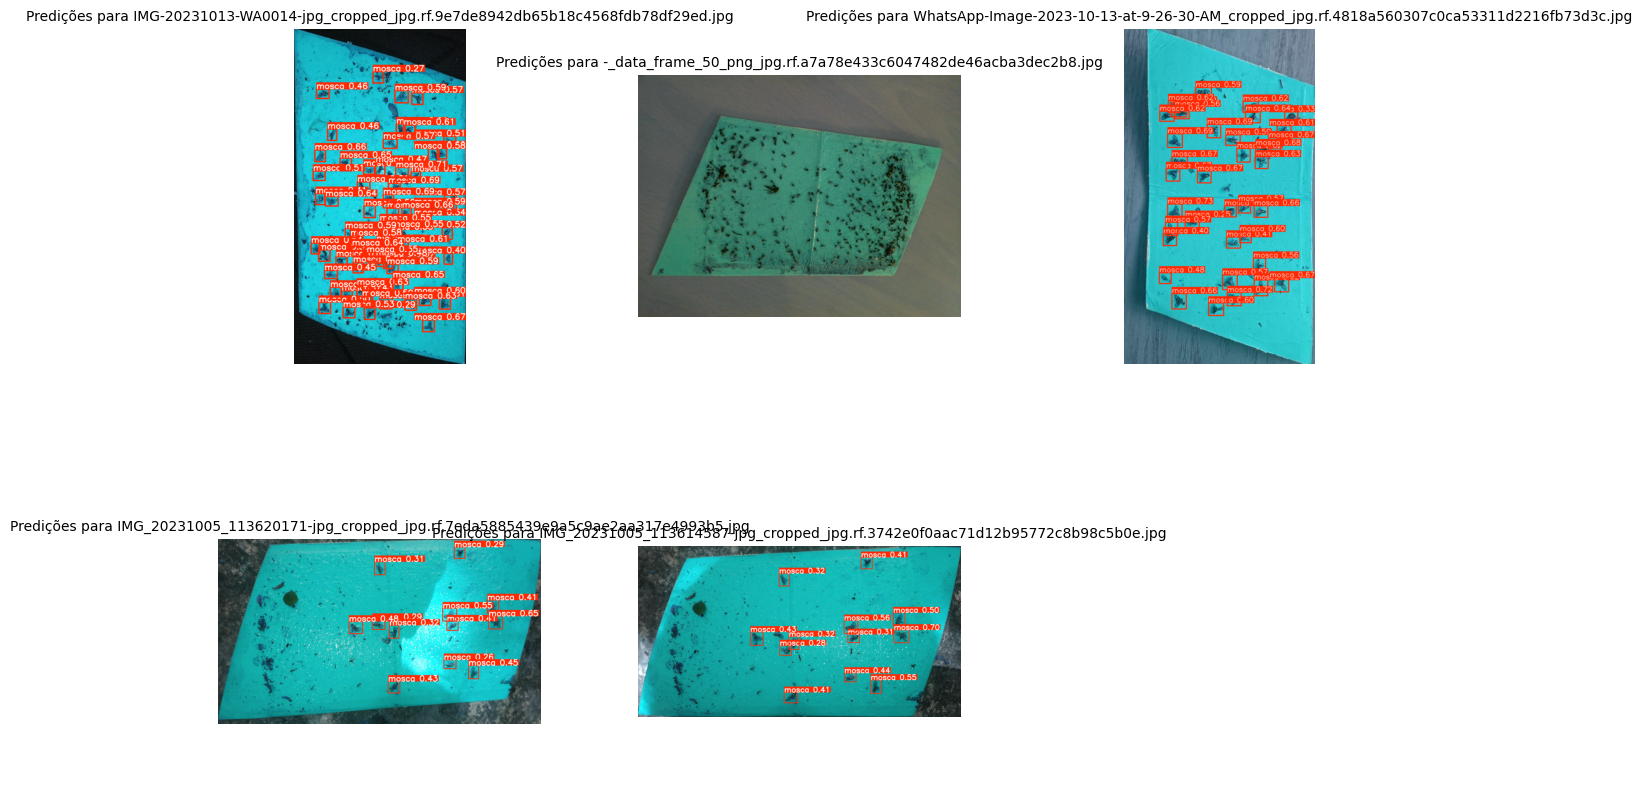

In [ ]:
import random
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path
from PIL import Image

# Diretório do conjunto de validação (ou teste) onde estão as imagens
val_images_dir = '/content/drive/MyDrive/AgroSense-V3_03/test/images'  # Altere se for o diretório de validação

# Diretório do modelo treinado
model_path = '/content/drive/MyDrive/AgroSense-V3_03/agroSense_projectV3/yellow_sticky_model/weights/best.pt'

# Carregar o modelo treinado
model = YOLO(model_path)

# Função para carregar e exibir 5 imagens aleatórias com as predições em um grid 2x3
def show_random_predictions_grid(images_dir, model, num_images=5):
    # Pegar o caminho de todas as imagens na pasta de validação
    image_paths = list(Path(images_dir).glob('*.jpg'))  # Adapte a extensão se necessário

    # Selecionar 5 imagens aleatórias
    random_images = random.sample(image_paths, num_images)

    # Configuração do grid 2x3
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    # Plotar as imagens e suas predições
    for i, img_path in enumerate(random_images):
        # Carregar a imagem
        img = Image.open(img_path)

        # Fazer predição com o modelo
        results = model(img)

        # Plotar a imagem com as predições no grid
        ax = axes[i // 3, i % 3]
        ax.imshow(results[0].plot())
        ax.axis('off')  # Esconder eixos
        ax.set_title(f'Predições para {img_path.name}', fontsize=10)

    # Deixar a última célula do grid vazia se tivermos menos de 6 imagens
    if num_images < 6:
        axes[-1, -1].axis('off')

    # Exibir o grid
    plt.show()

# Mostrar 5 imagens aleatórias com as predições
show_random_predictions_grid(val_images_dir, model)


In [ ]:
import os # imports the os module

# Mostrar as predições em uma imagem de exemplo
image_path = os.path.join(test_path, 'exemplo.jpeg')  # Certifique-se de que há uma imagem de exemplo
result = model.predict(source=image_path, show=True)  # Prever com base na imagem fornecida